## Locally conncted with no weights shared 
in the first three layers, where each input/neuron is connected to the neurons in a local neighbor in the next layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import itertools
#import keras

import time
import pickle

%matplotlib inline

print("All imported successfully!")

All imported successfully!


In [2]:
#Read data

train_file = "Data/zip_train.txt"

train_data = pd.read_csv(train_file, sep=' ', header = None)

#drop last column
train_data.drop([257], axis = 1, inplace = True)

print(train_data.shape)

(7291, 257)


In [3]:
#read test file

test_file = "Data/zip_test.txt"

test_data = pd.read_csv(test_file, sep=' ', header = None)

test_data.drop([1], axis = 1, inplace = True)

print(test_data.shape)

(2007, 257)


In [4]:
#get x and y datasets

x_train = (train_data.iloc[:, 1:].values).astype("float32")
y_train = (train_data.iloc[:, 0].values).astype("int32")
x_test = (test_data.iloc[:, 1:].values).astype("float32")
y_test = (test_data.iloc[:, 0].values).astype("int32")

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7291, 256)
(7291,)
(2007, 256)
(2007,)


In [5]:
#for Dense, input reshaping is not needed. For CNN, reshape the model here.
X_train = x_train.reshape(x_train.shape[0], 16, 16, 1)
X_test = x_test.reshape(x_test.shape[0], 16, 16, 1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (7291, 16, 16, 1)
X_test shape: (2007, 16, 16, 1)


In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, LocallyConnected2D
from sklearn.model_selection import train_test_split

print("all imported.")


Using TensorFlow backend.


all imported.


In [7]:
num_classes = 10

input_shape = (16,16,1)
print("input_shape:", input_shape)

batch_size = 64
epochs = 20

input_shape: (16, 16, 1)


In [8]:
#convert class vectors to binary clas metrices with one-hot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)
print(y_train_cat.shape)
print(y_test_cat.shape)

(7291, 10)
(2007, 10)


In [9]:
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train_cat, test_size = 0.1, random_state = 42)
print("X_train_train shape:", X_train_train.shape)
print("y_train_train shape:",y_train_train.shape)
print("X_train_val shape:",X_train_val.shape)
print("y_train_val shape:",y_train_val.shape)

X_train_train shape: (6561, 16, 16, 1)
y_train_train shape: (6561, 10)
X_train_val shape: (730, 16, 16, 1)
y_train_val shape: (730, 10)


In [12]:
# Locally connected network with shared weights. So this is a CNN.
# First let's just use Conv2D layers, then we'll add max pooling.

# Need to have at least four layers, 
# relu must be used in at least one layer, sigmoid/tanh must be used in at least one.

model3 = Sequential()

#loss: 0.0020 - acc: 0.9992 - val_loss: 0.0527 - val_acc: 0.9877
#model3.add(Conv2D(16, (3, 3), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
#model3.add(Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal"))
#model3.add(Conv2D(16, (3, 3), activation = "relu", kernel_initializer = "he_normal"))

#lets try with only 4 nodes.
#loss: 0.0428 - acc: 0.9884 - val_loss: 0.0900 - val_acc: 0.9767
#model3.add(Conv2D(4, (3, 3), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
#model3.add(Conv2D(4, (3, 3), activation = "relu", kernel_initializer = "he_normal"))
#model3.add(Conv2D(4, (3, 3), activation = "relu", kernel_initializer = "he_normal"))

#how about only 2 layers?
#yes, loss: 0.0139 - acc: 0.9980 - val_loss: 0.0649 - val_acc: 0.9836
#what sorcery is it?
#model3.add(Conv2D(4, (3, 3), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
#model3.add(Conv2D(4, (3, 3), activation = "relu", kernel_initializer = "he_normal"))

#go even more lighter. only 2 layers, with 2 nodes each.
#loss: 0.0778 - acc: 0.9787 - val_loss: 0.1262 - val_acc: 0.9699
#model3.add(Conv2D(2, (3, 3), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
#model3.add(Conv2D(2, (3, 3), activation = "relu", kernel_initializer = "he_normal"))

#how about only one layer?
#loss: 0.1144 - acc: 0.9715 - val_loss: 0.1431 - val_acc: 0.9644. Insane!
#model3.add(Conv2D(2, (3, 3), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))

#okay, lets make the filters bigger, like (5,5)
#loss: 0.1190 - acc: 0.9717 - val_loss: 0.1451 - val_acc: 0.9630
#model3.add(Conv2D(2, (5, 5), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
 
#increase filter size even more.    
#loss: 0.1681 - acc: 0.9531 - val_loss: 0.2033 - val_acc: 0.9411
#model3.add(Conv2D(2, (9, 9), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))

#okay, filter size 16. So 1 filter per layer.
#Finally, this didn't work.
#loss: 1.7289 - acc: 0.3056 - val_loss: 1.7337 - val_acc: 0.3041
#model3.add(Conv2D(1, (16, 16), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))

#try (11,11) filter
#loss: 0.5680 - acc: 0.8302 - val_loss: 0.6186 - val_acc: 0.8315
#model3.add(Conv2D(1, (11, 11), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
    
#will having 2 layers of filter help?
#yes, a bit. loss: 0.2576 - acc: 0.9276 - val_loss: 0.2675 - val_acc: 0.9288
#model3.add(Conv2D(2, (11, 11), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
 
#Have 4 filter then    
model3.add(Conv2D(4, (11, 11), input_shape = input_shape, activation = "tanh", kernel_initializer = "he_normal"))
     
model3.add(Flatten())
model3.add(Dense(num_classes, activation = "softmax"))

model3.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.RMSprop(), 
              metrics = ["accuracy"])

print("model3 created.")

model3.summary()

model3 created.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 1, 1, 1)           257       
_________________________________________________________________
flatten_3 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20        
Total params: 277
Trainable params: 277
Non-trainable params: 0
_________________________________________________________________


## trainings are done in Tesla. So comment the block here.

In [14]:
#now train it. Save the weights and history.

#start_time = time.time()

#h = model3.fit(X_train_train, y_train_train, batch_size = batch_size, epochs = epochs, validation_data = (X_train_val, y_train_val), verbose = 1)

#model3.save_weights("model3_weights.h5")
#pickle.dump(h.history, open("model3_history.pk","wb"))

#end_time = time.time()

#print("total training time: ", end_time - start_time)


In [34]:
#traing done. So load the weights and test.

model3.load_weights("model3_weights.h5")

final_loss, final_acc = model2.evaluate(X_test, y_test_cat, verbose = 0)
print("final loss: {0:.6f}, final accuracy: {1:.6f}".format(final_loss, final_acc))


final loss: 0.523966, final accuracy: 0.952167


(2007, 10)
(2007,)
(2007,)


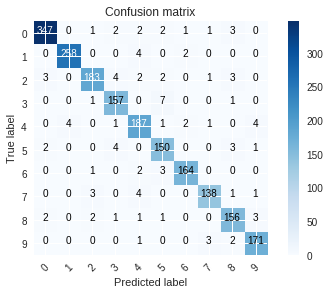

In [35]:
# Look at confusion matrix 
#Note, this code is taken straight from the SKLEARN website, an nice way of viewing confusion matrix.
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model3.predict(X_test)
print(Y_pred.shape)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
print(Y_pred_classes.shape)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test_cat, axis = 1) 
print(Y_true.shape)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [36]:
#load model history
import pickle

hist = pickle.load(open("model3_history.pk","rb"))
print(hist.keys())

dict_keys(['val_loss', 'loss', 'acc', 'val_acc'])


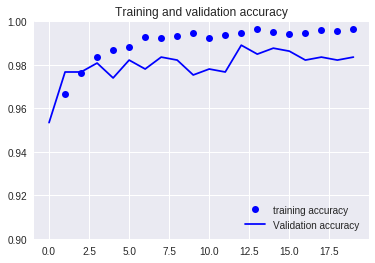

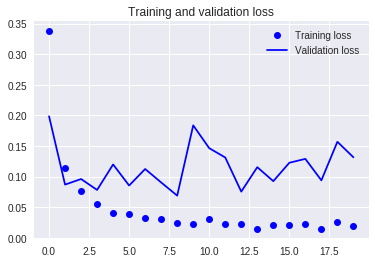

training accuracy: [0.89483310485500289, 0.96677335771077511, 0.97637555250723973, 0.98338667885992992, 0.98704465782655082, 0.98841639993903363, 0.99298887364730981, 0.99222679469593045, 0.99314128943758573, 0.99481786327597532, 0.99237921048620636, 0.99375095259868917, 0.99451303155006854, 0.9963420210333791, 0.99497027892089618, 0.99420819996951681, 0.99466544734034446, 0.99603718945282727, 0.99573235787227554, 0.99664685261393082]
validation accuracy: [0.95342465655444419, 0.97671232778732087, 0.9767123289304237, 0.9808219168284168, 0.97397260175992362, 0.98219177984211548, 0.97808219080101955, 0.98356164285581404, 0.98219177984211548, 0.9753424647736223, 0.97808219194412227, 0.97671232778732087, 0.98904109491060854, 0.98493150586951272, 0.98767123189690997, 0.98630136888321129, 0.98219177984211548, 0.98356164285581404, 0.98219177984211548, 0.98356164285581404]


In [37]:
accuracy = hist["acc"]
val_accuracy = hist["val_acc"]
loss = hist["loss"]
val_loss = hist["val_loss"]
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "bo", label = "training accuracy")
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.ylim(0.9, 1)
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
plt.figure()
               
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print("training accuracy:", accuracy)
#print("average training accuracy:", np.mean(accuracy))

print("validation accuracy:", val_accuracy)
#print("average validation accuracy:", np.mean(val_accuracy))


In [38]:
#lets manually examine some errors
errors = (Y_pred_classes - Y_true != 0)
print(errors.shape)
print(errors[:10])
Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = X_test[errors]
print(Y_pred_classes_errors.shape)
print(Y_pred_errors.shape)
print(Y_true_errors.shape)
print(X_val_errors.shape)

(2007,)
[False False False False False False False False False False]
(96,)
(96, 10)
(96,)
(96, 16, 16, 1)


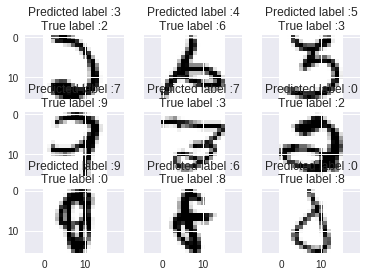

In [30]:
#show the errors
%matplotlib inline

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 3
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((16,16)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1
            
# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-25:]

# Show the top 6 errors
#display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)
display_errors([x for x in range(10)], X_val_errors, Y_pred_classes_errors, Y_true_errors)

(2007,)
[9 6 3 6 6 0 0 0 6 9 6 2 3 4 0 3 1 4 9 6]
(2007,)
[9 6 3 6 6 0 0 0 6 9 6 2 2 4 0 3 1 6 9 6]
279
predicted: 3
true: 2


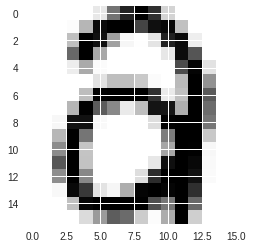

In [39]:
print(Y_pred_classes.shape)
print(Y_pred_classes[:20])
print(Y_true.shape)
print(Y_true[:20])

#get the index of the a mismatched item
which_mismatched_item = 15
id = np.nonzero(Y_pred_classes != Y_true)[0][which_mismatched_item]
print(id)

plt.imshow(X_test[id].reshape(16,16))
print("predicted:", Y_pred_classes[id])
print("true:", Y_true[id])




In [ ]:
# Done with this. Mode to barebone_model_3 (CNN )